# Are my actions the same as Adrian's?

Load my and Adrian's data.

In [5]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.table import Table

In [13]:
# Adrian's actions
fname = "/Users/ruthangus/Desktop/gaiadr2-good-plx-actions.fits"
with fits.open(fname) as hdu1:
    data = hdu1[1].data
    #hdr = hdul[1].header
#print(hdr)

In [14]:
jr, lz, jz = np.array(data["actions"]).T

source_id = data.source_id.byteswap().newbyteorder()
ra = data.ra.byteswap().newbyteorder()
dec = data.dec.byteswap().newbyteorder()

adrian = pd.DataFrame(dict({"source_id": source_id,
                            "ra": ra, "dec": dec,
                            "jr": jr, "lz": lz, "jz": jz
                            }))

In [15]:
# Load my actions:
ruth = pd.read_csv("stlr_gaia_actions.csv")
for key in ruth.keys():
    print(key)

fudge = 1
ramax, ramin = max(ruth.ra_stlr) + fudge, min(ruth.ra_stlr) - fudge
decmax, decmin = max(ruth.dec_stlr) + fudge, min(ruth.dec_stlr) - fudge

Unnamed: 0
kepid
tm_designation_stlr
teff_stlr
teff_err1_stlr
teff_err2_stlr
logg_stlr
logg_err1_stlr
logg_err2_stlr
feh_stlr
feh_err1_stlr
feh_err2_stlr
mass_stlr
mass_err1_stlr
mass_err2_stlr
radius_stlr
radius_err1_stlr
radius_err2_stlr
dens
dens_err1
dens_err2
prov_sec_stlr
kepmag_stlr
limbdark_coeff1
limbdark_coeff2
limbdark_coeff3
limbdark_coeff4
dist
dist_err1
dist_err2
nconfp_stlr
nkoi_stlr
ntce_stlr
datalink_dvr
st_delivname
st_vet_date_str
ra_stlr
dec_stlr
st_quarters
teff_prov_stlr
logg_prov_stlr
feh_prov_stlr
jmag_stlr
jmag_err
hmag_stlr
hmag_err
kmag_stlr
kmag_err
dutycycle
dataspan
mesthres01p5
mesthres02p0
mesthres02p5
mesthres03p0
mesthres03p5
mesthres04p5
mesthres05p0
mesthres06p0
mesthres07p5
mesthres09p0
mesthres10p5
mesthres12p0
mesthres12p5
mesthres15p0
rrmscdpp01p5
rrmscdpp02p0
rrmscdpp02p5
rrmscdpp03p0
rrmscdpp03p5
rrmscdpp04p5
rrmscdpp05p0
rrmscdpp06p0
rrmscdpp07p5
rrmscdpp09p0
rrmscdpp10p5
rrmscdpp12p0
rrmscdpp12p5
rrmscdpp15p0
av
av_err1
av_err2
dutycycle_post

In [16]:
# Make cuts on RA and dec so that Adrian's catalogue isn't so big
print(np.shape(adrian))
m = ramin < adrian.ra.values
m &= decmin < adrian.dec.values
m &= adrian.ra.values < ramax 
m &= adrian.dec.values < decmax 
ad = adrian.iloc[m]

(6183947, 6)


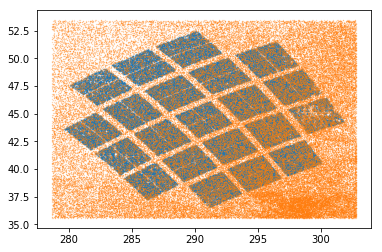

In [17]:
plt.plot(ruth.ra_stlr, ruth.dec_stlr, ".", ms=1, alpha=.5)
plt.plot(ad.ra, ad.dec, ".", ms=.5, alpha=.5)

In [18]:
df = pd.merge(ad, ruth, on="source_id", suffixes=["_adrian", "_ruth"])

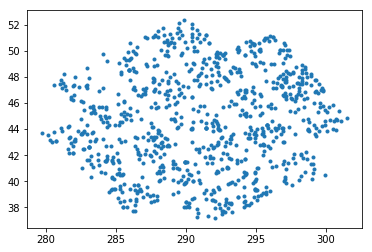

In [19]:
plt.plot(df.ra, df.dec, ".")

Text(0,0.5,"Adrian's Jz")

/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


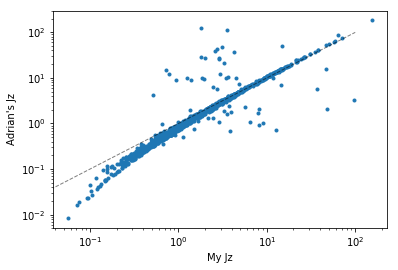

In [20]:
plt.loglog(df.J_z, df.jz, ".")
xs = np.linspace(0, 100, 100)
plt.plot(xs, xs, "k", ls="--", lw=1, alpha=.5)
plt.xlabel("My Jz")
plt.ylabel("Adrian's Jz")

Text(0,0.5,"Adrian's Lz")

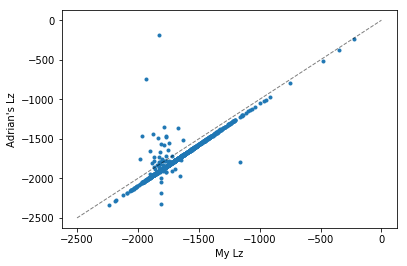

In [21]:
plt.plot(-df.L_z, df.lz, ".")
xs = np.linspace(-2500, 0, 100)
plt.plot(xs, xs, "k", ls="--", lw=1, alpha=.5)
plt.xlabel("My Lz")
plt.ylabel("Adrian's Lz")

Text(0,0.5,"Adrian's Jr")

/Users/ruthangus/anaconda/lib/python3.5/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


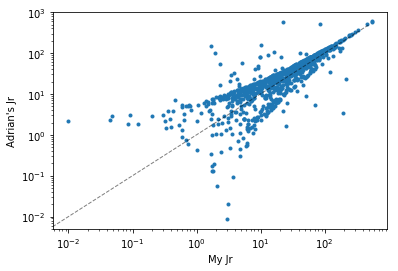

In [22]:
plt.loglog(df.J_R, df.jr, ".")
xs = np.linspace(0, 500, 100)
plt.plot(xs, xs, "k", ls="--", lw=1, alpha=.5)
plt.xlabel("My Jr")
plt.ylabel("Adrian's Jr")

Check Jz against ages from Sanders et al.

In [23]:
file = "gaia_spectro.hdf5"
from astropy.table import Table
data = Table.read(file)
sanders = data.to_pandas()

In [24]:
sanders

,obsid,source_id,dm,dm_err,dist,dist_err,par,par_err,log10_age,log10_age_err,...,Rc_err,flag,survey,raveid,APOGEE_ID,sobject_id,CNAME,specobjid,duplicated,best
0,248106164.0,2.062921e+18,10.115902,0.049743,1.055101,0.024094,0.948274,0.021789,0.343218,0.514558,...,0.097426,0,b'LAMOST',b'',b'',0.0,b'',0,0,1
1,248106152.0,2.063088e+18,8.952560,0.014625,0.617336,0.004156,1.619936,0.010916,0.355961,0.031417,...,0.039661,0,b'LAMOST',b'',b'',0.0,b'',0,0,1
2,248106154.0,2.063113e+18,9.560143,0.013398,0.816652,0.005001,1.224559,0.007614,0.178302,0.223331,...,0.069572,0,b'LAMOST',b'',b'',0.0,b'',0,0,1
3,248106165.0,2.063113e+18,10.478582,0.042052,1.246803,0.024094,0.802352,0.015574,0.224452,0.125430,...,0.129212,0,b'LAMOST',b'',b'',0.0,b'',0,0,1
4,248106158.0,2.063124e+18,9.750666,0.009436,0.891533,0.003876,1.121685,0.004873,0.168500,0.261357,...,0.049717,0,b'LAMOST',b'',b'',0.0,b'',0,0,1
5,248106159.0,2.063117e+18,7.919530,0.015098,0.383634,0.002670,2.606780,0.018110,0.775343,0.216707,...,0.241518,0,b'LAMOST',b'',b'',0.0,b'',0,0,1
6,248106169.0,2.063113e+18,10.323832,0.040465,1.161026,0.021713,0.861606,0.016002,0.578386,0.086842,...,0.220804,0,b'LAMOST',b'',b'',0.0,b'',0,0,1
7,248106168.0,2.063119e+18,10.240308,0.050790,1.117327,0.026117,0.895483,0.020956,0.245185,0.138768,...,0.172475,0,b'LAMOST',b'',b'',0.0,b'',0,0,1
8,248106151.0,2.063124e+18,10.767431,0.003839,1.423924,0.002537,0.702287,0.001233,-0.200003,0.000567,...,0.714067,0,b'LAMOST',b'',b'',0.0,b'',0,0,1
9,248106130.0,2.063120e+18,10.417033,0.035611,1.211895,0.019965,0.825376,0.013479,0.305329,0.142966,...,1.116374,0,b'LAMOST',b'',b'',0.0,b'',0,0,1


Crossmatch my catalogue with Jason's.

In [25]:
ruth_sanders = pd.merge(ruth, sanders, on="source_id", suffixes=["_r", "_s"])

In [26]:
print(np.shape(sanders), np.shape(ruth), np.shape(ruth_sanders))

(4906746, 62) (85492, 207) (5723, 268)


/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


Text(0,0.5,'Jz')

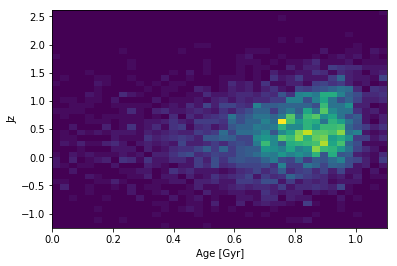

In [44]:
m = ruth_sanders.log10_age.values > 0
plt.hist2d(ruth_sanders.log10_age.values[m], np.log10(ruth_sanders.J_z.values[m]), bins=40)
plt.xlabel("Age [Gyr]")
plt.ylabel("Jz")

/Users/ruthangus/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


Text(0,0.5,'Jz')

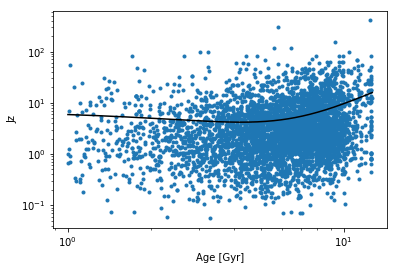

In [83]:
m = ruth_sanders.log10_age.values > 0
m &= np.isfinite(ruth_sanders.log10_age.values)
m &= np.isfinite(ruth_sanders.J_z.values)

x, y = 10**ruth_sanders.log10_age.values[m], ruth_sanders.J_z.values[m]
inds = np.argsort(x)
x, y = x[inds], y[inds]

AT = np.vstack((np.ones(len(x)), x, x**2))
ATA = np.dot(AT, AT.T)
a, b, c = np.linalg.solve(ATA, np.dot(AT, y))

plt.loglog(x, y, ".")
plt.loglog(x, a + b*x + c*x**2, "k-")

plt.xlabel("Age [Gyr]")
plt.ylabel("Jz")

Plot running median

12.714520120082803 11.675754069527992


Text(0,0.5,'Jz')

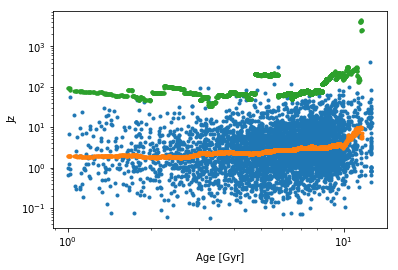

In [94]:
width = 1  # 1 Gyr width bins
bins = x[(width < x) & (x < max(x) - width)]

medians, v = [np.zeros(len(bins)) for i in range(2)]
for i in range(len(bins)):
    inds = (bins[i] < x) & (x < bins[i] + width)
    medians[i] = np.median(y[inds])
    v[i] = np.var(y[inds])

print(max(x), max(bins))
plt.loglog(x, y, ".")
plt.loglog(bins, medians, ".")
plt.loglog(bins, v, ".")
plt.loglog(x, b*x + c, "k-")
plt.xlabel("Age [Gyr]")
plt.ylabel("Jz")

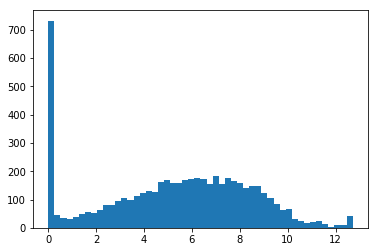

In [35]:
plt.hist(10**ruth_sanders.log10_age[~np.isnan(10**ruth_sanders.log10_age)], 50);